In [48]:
import numpy as np
import pandas as pd

df = pd.read_csv('Inputs/drug-sales.csv')

df['date'] = pd.to_datetime(df['date'])

In [49]:
from statsmodels.tsa.stattools import adfuller

test = adfuller(df['value'])

print(test[1])

1.0


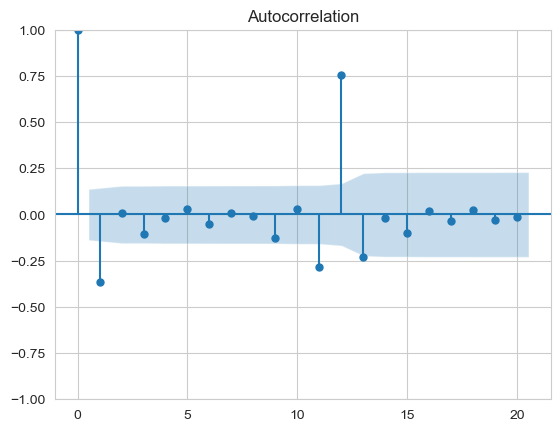

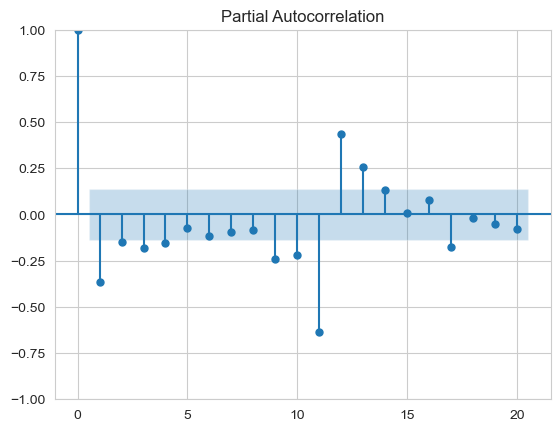

In [50]:
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['value'].diff().dropna(), lags=20)
plot_pacf(df['value'].diff().dropna(), lags=20)

plt.show()

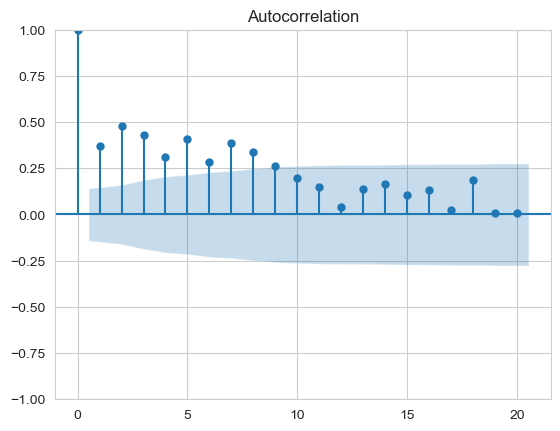

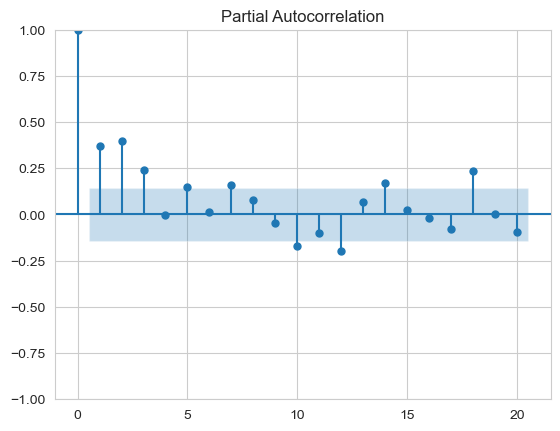

In [51]:
plot_acf(df['value'].diff(12).dropna(), lags=20)
plot_pacf(df['value'].diff(12).dropna(), lags=20)

plt.show()

C:\Users\simsh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


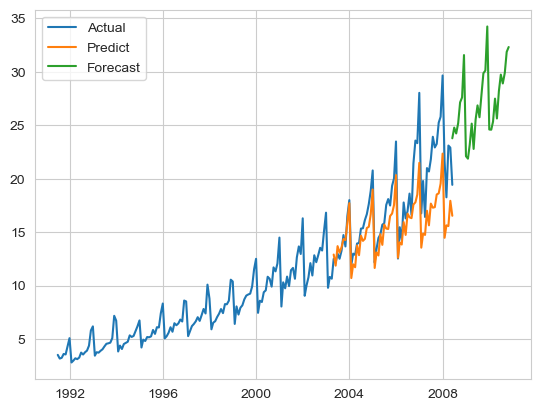

Model performance 3.29875292224878


In [86]:
train = df[0:int(0.7*len(df))]
test = df[int(0.7*len(df)):]

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

arima = ARIMA(train['value'], order=(1,1,1), seasonal_order=(2,1,2,12))
model_fit = arima.fit()
predict = model_fit.predict(start=len(train), end=len(df) - 1)

date_range = pd.date_range(start=df['date'].max(), periods=30, freq='MS')
forecast = model_fit.predict(start=len(df), end=len(df) + len(date_range) - 1)


arima = ARIMA(df['value'], order=(1,1,1), seasonal_order=(2,1,2,12))
model_fit = arima.fit()
forecast = model_fit.predict(start=len(df), end=len(df) + len(date_range) - 1)

plt.plot(df['date'], df['value'], label='Actual')
plt.plot(test['date'], predict, label='Predict')
plt.plot(date_range,  forecast, label='Forecast')

plt.legend(loc='best')

plt.show()

rmse = np.sqrt(mean_squared_error(test['value'], predict))

print('Model performance', rmse)

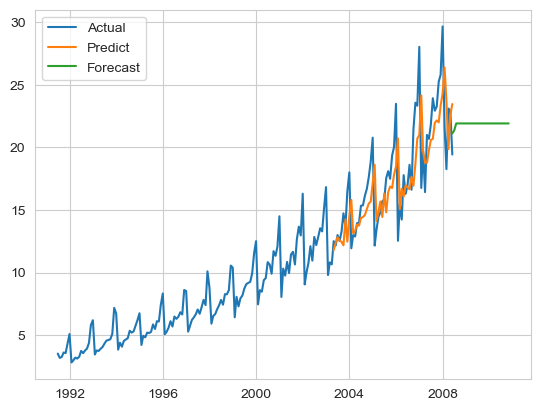

In [81]:
train = df[0:int(0.7*len(df))]
test = df[int(0.7*len(df)):].reset_index()

predict = []
actual = train['value'].tolist()

for i in range(len(test)):
    arima = ARIMA(actual, order=(1,1,3))
    model_fit = arima.fit()
    
    pre_output = model_fit.forecast()[0]
    predict.append(pre_output)
    
    actual.append(test['value'].loc[i])
    
plt.plot(df['date'], df['value'], label='Actual')
plt.plot(test['date'], predict, label='Predict')

date_range = pd.date_range(start=df['date'].max(), periods=30, freq='MS')

arima = ARIMA(df['value'], order=(1,1,3))
model_fit = arima.fit()

plt.plot(date_range,  model_fit.forecast(steps=30), label='Forecast')

plt.legend(loc='best')

plt.show()

In [77]:
rmse = np.sqrt(mean_squared_error(test['value'], predict))

print('Model performance', rmse)

Model performance 2.9759820112788056
